In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Data Analysis.ipynb', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'README.md', 'Research Proposal.ipynb']


<IPython.core.display.Javascript object>

In [2]:
energy = pd.read_csv("modern-renewable-energy-consumption.csv")

<IPython.core.display.Javascript object>

In [16]:
# To clean up the data and only show countries relevant to the research question, I separated the data frames by country 
us = energy[energy["Entity"] == "United States"]
china = energy[energy["Entity"] == "China"]
india = energy[energy["Entity"] == "India"]

<IPython.core.display.Javascript object>

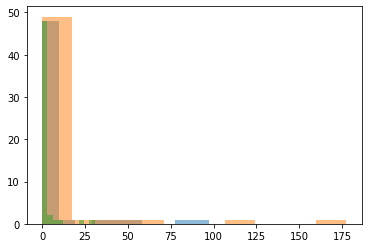

DescribeResult(nobs=54, minmax=(0.0, 97.1181818181818), mean=6.418881630705138, variance=361.5744448211558, skewness=3.517263877065951, kurtosis=11.896304854245331)
DescribeResult(nobs=54, minmax=(0.0, 177.5), mean=8.155121352648148, variance=908.2587526342356, skewness=4.418925359265665, kurtosis=19.767091841491474)
DescribeResult(nobs=54, minmax=(0.0, 30.732403179000002), mean=1.5198382238535355, variance=28.31339464691459, skewness=4.292845795015623, kurtosis=18.570513829939806)


<IPython.core.display.Javascript object>

In [24]:
# With a skewness and kurtosis of > 3, we can tell the data is not normal
plt.hist(us["Solar (terawatt-hours)"], alpha=0.5)
plt.hist(china["Solar (terawatt-hours)"], alpha=0.5)
plt.hist(india["Solar (terawatt-hours)"], alpha=0.5)
plt.show()
print(stats.describe(us["Solar (terawatt-hours)"]))
print(stats.describe(china["Solar (terawatt-hours)"]))
print(stats.describe(india["Solar (terawatt-hours)"]))

In [27]:
# Since the data is not normal we cannot use an ANOVA test.
# Therefore, I used a kruskal wallice test to compare the three variables.
stats.kruskal(
    us["Solar (terawatt-hours)"],
    china["Solar (terawatt-hours)"],
    india["Solar (terawatt-hours)"],
)

KruskalResult(statistic=10.10226009559649, pvalue=0.006402094683951255)

<IPython.core.display.Javascript object>

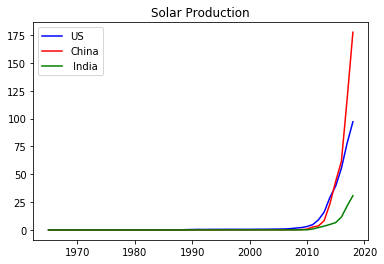

<IPython.core.display.Javascript object>

In [58]:
plt.plot(us["Year"], us["Solar (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Solar (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Solar (terawatt-hours)"], "-g", label=" India")
plt.title("Solar Production")
plt.legend(loc="upper left")

DescribeResult(nobs=54, minmax=(0.0, 277.729106060603), mean=36.338228787878386, variance=5275.500039845446, skewness=2.075558098704107, kurtosis=3.0633358251444864)
DescribeResult(nobs=54, minmax=(0.0, 366.0), mean=30.569947063224838, variance=6087.941857488773, skewness=2.8571847007209397, kurtosis=7.581960344575439)
DescribeResult(nobs=54, minmax=(0.0, 60.31116), mean=7.408920611672278, variance=205.82878096986, skewness=2.1550043635377016, kurtosis=3.897299222618037)


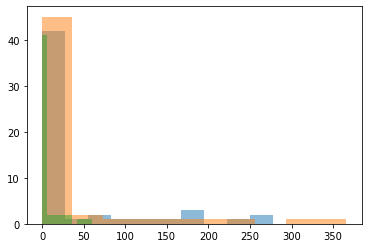

<IPython.core.display.Javascript object>

In [26]:
# With a kurtosis of > 3, we can tell the data is not normal
plt.hist(us["Wind (terawatt-hours)"], alpha=0.5)
plt.hist(china["Wind (terawatt-hours)"], alpha=0.5)
plt.hist(india["Wind (terawatt-hours)"], alpha=0.5)
print(stats.describe(us["Wind (terawatt-hours)"]))
print(stats.describe(china["Wind (terawatt-hours)"]))
print(stats.describe(india["Wind (terawatt-hours)"]))

In [28]:
# Since the data is not normal we cannot use an ANOVA test.
# Therefore, I used a kruskal wallice test to compare the three variables.
stats.kruskal(
    us["Wind (terawatt-hours)"],
    china["Wind (terawatt-hours)"],
    india["Wind (terawatt-hours)"],
)

KruskalResult(statistic=4.198967690086662, pvalue=0.12251965106037972)

<IPython.core.display.Javascript object>

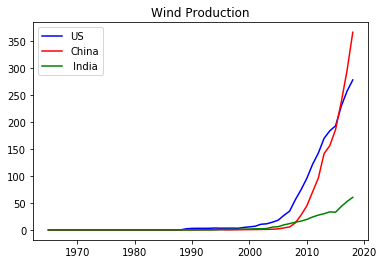

<IPython.core.display.Javascript object>

In [57]:
plt.plot(us["Year"], us["Wind (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Wind (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Wind (terawatt-hours)"], "-g", label=" India")
plt.title("Wind Production")
plt.legend(loc="upper left")